<a href="https://colab.research.google.com/github/geraldmogi/insitustressprediction/blob/main/Project_Well.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# **1. IMPORT WELL DATA**

In [5]:
url = 'https://raw.githubusercontent.com/geraldmogi/insitustressprediction/main/LostHillsX.csv'
df_X = pd.read_csv(url)

In [6]:
url_2 = 'https://raw.githubusercontent.com/geraldmogi/insitustressprediction/main/LostHillsY.csv'
df_y = pd.read_csv(url_2)

# **2. VIEW DATA TYPE**

As we can see the data type in df_X and df_Y are numeric data as we want. If the data is not in int or float then we have to convert it because in regression model we need to use numeric data type.

In [7]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DEPTH          167 non-null    int64  
 1   Pore_Pressure  167 non-null    int64  
 2   Density        167 non-null    float64
 3   dt_comp        167 non-null    int64  
 4   dt_shear       167 non-null    int64  
 5   Porosity       167 non-null    float64
 6   Vp             167 non-null    int64  
 7   Vs             167 non-null    int64  
 8   Edyn           167 non-null    int64  
 9   PR             167 non-null    float64
 10  Esta           167 non-null    int64  
 11  E'sta          167 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 15.8 KB


In [8]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Sv          167 non-null    int64
 1   Sigma_v     167 non-null    int64
 2   Sigma_Hmax  167 non-null    int64
dtypes: int64(3)
memory usage: 4.0 KB


#**3. Train Test Split**

Create train data and test data for our regression model. Train data will be used to train our regression model to study variables and correlations between variables to predict data. Test data is used to test our regression model.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df_X
y = df_y['Sigma_Hmax']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

#**4. Modelling**

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
default_model = RandomForestRegressor()

In [19]:
default_model.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
y_prediction = default_model.predict(X_test)

#**5. Evaluate Our Default Random Forest Regression Model**

Evaluate our regression model using the mean absolute error, Root Mean Square Error, and R2 metrics.

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MAE: 19.29509803921569
RMSE: 25.620925156644
R2: 97.67599752621517




Text(0.5, 0, 'True Value')

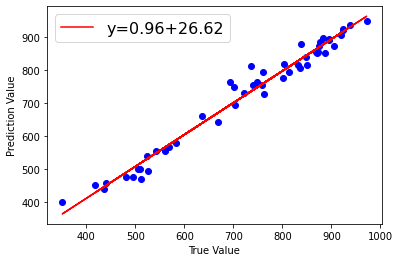

In [111]:
#Evaluation
MAE = mean_absolute_error(y_test, y_prediction)
RMSE = np.sqrt(mean_squared_error(y_test, y_prediction))
R2 = r2_score(y_test, y_prediction)*100
print(f'MAE:', MAE)
print(f'RMSE:', RMSE)
print(f'R2:', R2)
print('\n')

#Plot
plt.scatter(y_test, y_prediction, c='blue')
m, b = np.polyfit(y_test, y_prediction, 1)
plt.plot(y_test, m*y_test + b, label='y={:.2f}+{:.2f}'.format(m,b), c='red')
plt.legend(fontsize=16)
plt.ylabel('Prediction Value')
plt.xlabel('True Value')

# **6. Tuning Our Random Forest Regression Model

At this stage we use GridSearchCV to find the best hyperparameters for our random forest regression model so that our model can predict better.

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
rfr = RandomForestRegressor()

In [57]:
param_grid = {'n_estimators': [64, 100, 128, 200, 300, 500],
             'max_features': [2,3,4,6],
             'bootstrap': [True,False]}

In [58]:
grid = GridSearchCV(rfr, param_grid=param_grid)

In [59]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 6],
                         'n_estimators': [64, 100, 128, 200, 300, 500]})

This is the best hyperparameter for our Random Forest Regression Model to predict better.

In [60]:
grid.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 128}

In [65]:
y_prediction_2 = grid.predict(X_test)

# **7. Evaluating Our Random Forest Regression After Tuning**

After doing GridSearchCV, it was found that the best hyperparameter for our model. Now we evaluate our model after we use the new hyperparameter and compare it with the default model before which to know which one is better to predict maximum horizontal stress (sigma_SHmax).

MAE: 13.8203125
RMSE: 19.6786630895368
R2: 98.62899780155051




Text(0.5, 0, 'True Value')

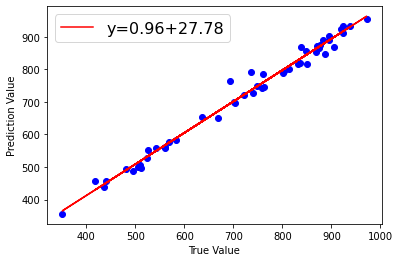

In [112]:
#Evaluation
MAE = mean_absolute_error(y_test, y_prediction_2)
RMSE = np.sqrt(mean_squared_error(y_test, y_prediction_2))
R2 = r2_score(y_test, y_prediction_2)*100
print(f'MAE:', MAE)
print(f'RMSE:', RMSE)
print(f'R2:', R2)
print('\n')

#Plot
plt.scatter(y_test, y_prediction_2, c='blue')
m, b = np.polyfit(y_test, y_prediction_2, 1)
plt.plot(y_test, m*y_test + b, label='y={:.2f}+{:.2f}'.format(m,b), c='red')
plt.legend(fontsize=16)
plt.ylabel('Prediction Value')
plt.xlabel('True Value')

# **8. Conlusion**

After tuning our model, we get a new hyperparameter that makes our model more accurate in predicting the SHmax value. Previously, our Random Forest Regression Model was able to predict the maximum horizontal stress value of 97.6% accurately, with an RMSE value of 25.62 psi. After tuning with GridSearchCV to get a new hyperparameter, our Random Forest Regression Model is able to predict the maximum horizontal stress value of 98.6% accurately, with an RMSE value of 19.67 psi.

MODEL EVALUATION AFTER TUNING
MAE: 19.29509803921569
RMSE: 25.620925156644
R2: 97.67599752621517


MODEL EVALUATION AFTER TUNING
MAE: 13.8203125
RMSE: 19.6786630895368
R2: 98.62899780155051




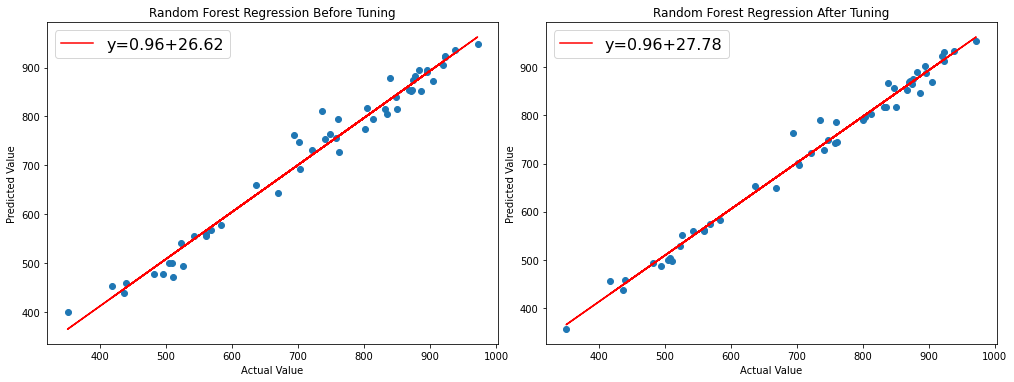

In [158]:
#Model Evaluation Before Tuning
MAE = mean_absolute_error(y_test, y_prediction)
RMSE = np.sqrt(mean_squared_error(y_test, y_prediction))
R2 = r2_score(y_test, y_prediction)*100
print('MODEL EVALUATION AFTER TUNING')
print(f'MAE:', MAE)
print(f'RMSE:', RMSE)
print(f'R2:', R2)
print('\n')

#Model Evaluation After Tuning
MAE = mean_absolute_error(y_test, y_prediction_2)
RMSE = np.sqrt(mean_squared_error(y_test, y_prediction_2))
R2 = r2_score(y_test, y_prediction_2)*100
print('MODEL EVALUATION AFTER TUNING')
print(f'MAE:', MAE)
print(f'RMSE:', RMSE)
print(f'R2:', R2)
print('\n')

#SUBPLOT
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
axes[0].scatter(y_test, y_prediction)
axes[1].scatter(y_test, y_prediction_2)
fig.tight_layout()

#PLOT 1
m, b = np.polyfit(y_test, y_prediction, 1)
axes[0].plot(y_test, m*y_test + b, label='y={:.2f}+{:.2f}'.format(m,b), c='red')
axes[0].legend(fontsize=16)
axes[0].title.set_text('Random Forest Regression Before Tuning')
axes[0].set_xlabel('Actual Value')
axes[0].set_ylabel('Predicted Value')

#PLOT 2
m, b = np.polyfit(y_test, y_prediction_2, 1)
axes[1].plot(y_test, m*y_test + b, label='y={:.2f}+{:.2f}'.format(m,b), c='red')
axes[1].legend(fontsize=16)
axes[1].title.set_text('Random Forest Regression After Tuning')
axes[1].set_xlabel('Actual Value')
axes[1].set_ylabel('Predicted Value')
plt.show()